In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm

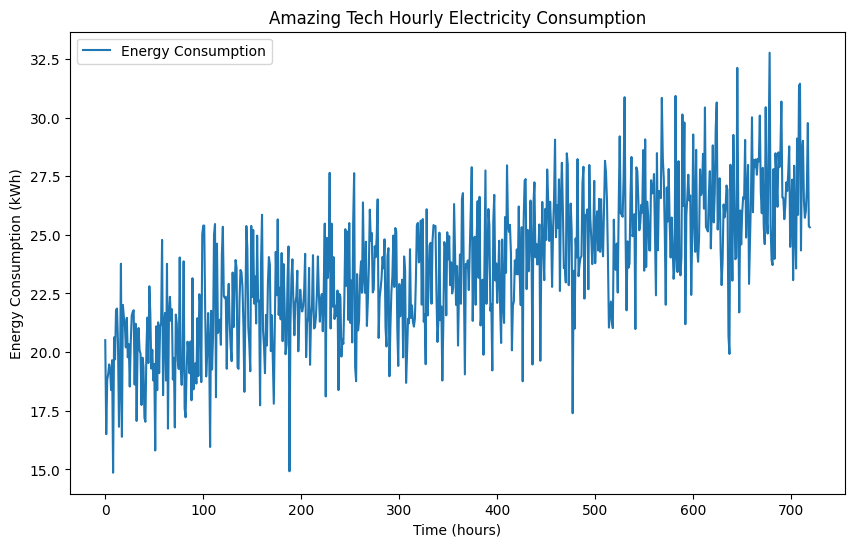

In [13]:
np.random.seed(2546)

# Parameters for simulation
n_hours = 30*24  # Number of hours to simulate 
trend_slope = 0.01  # Linear trend slope (increase per hour)
noise = 2  # Noise

# Time array (hours)
time = np.arange(n_hours)

# Simulate linear trend and random noise
trend = 20+ trend_slope * time 
noise = noise * np.random.randn(n_hours)  

# Simulate energy consumption series (trend + noise)
energy_consumption = trend + noise

# Create a DataFrame
df = pd.DataFrame({'time': time, 'energy_consumption': energy_consumption})

# Plot the simulated data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['energy_consumption'], label="Energy Consumption")
plt.xlabel('Time (hours)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Amazing Tech Hourly Electricity Consumption')
plt.legend()
plt.show()


In [49]:
# Split the data into training and test sets 
train_size = int(len(df['energy_consumption']) * 0.99)
train, test = df['energy_consumption'][:train_size], df['energy_consumption'][train_size:]

In [52]:
result = adfuller(train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.2342435188870717
p-value: 0.6586943359033308


In [53]:
# First differencing
energy_consumption_diff1 = train.diff().dropna()

# Perform ADF test after differencing
result_diff1 = adfuller(energy_consumption_diff1.dropna())
print(f'ADF Statistic (1st Differencing): {result_diff1[0]}')
print(f'p-value (1st Differencing): {result_diff1[1]}')

ADF Statistic (1st Differencing): -10.498929791421501
p-value (1st Differencing): 1.096854136377358e-18


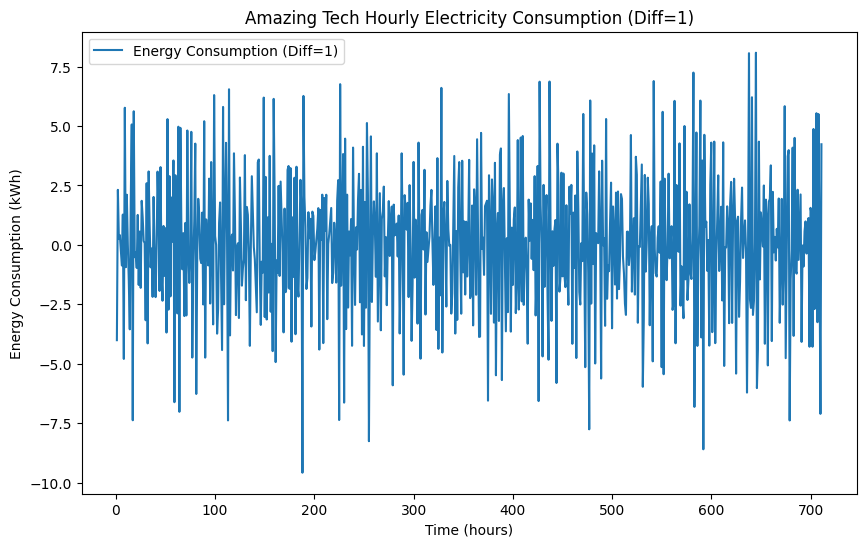

In [55]:
# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(energy_consumption_diff1, label="Energy Consumption (Diff=1)")
plt.xlabel('Time (hours)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Amazing Tech Hourly Electricity Consumption (Diff=1)')
plt.legend()
plt.show()

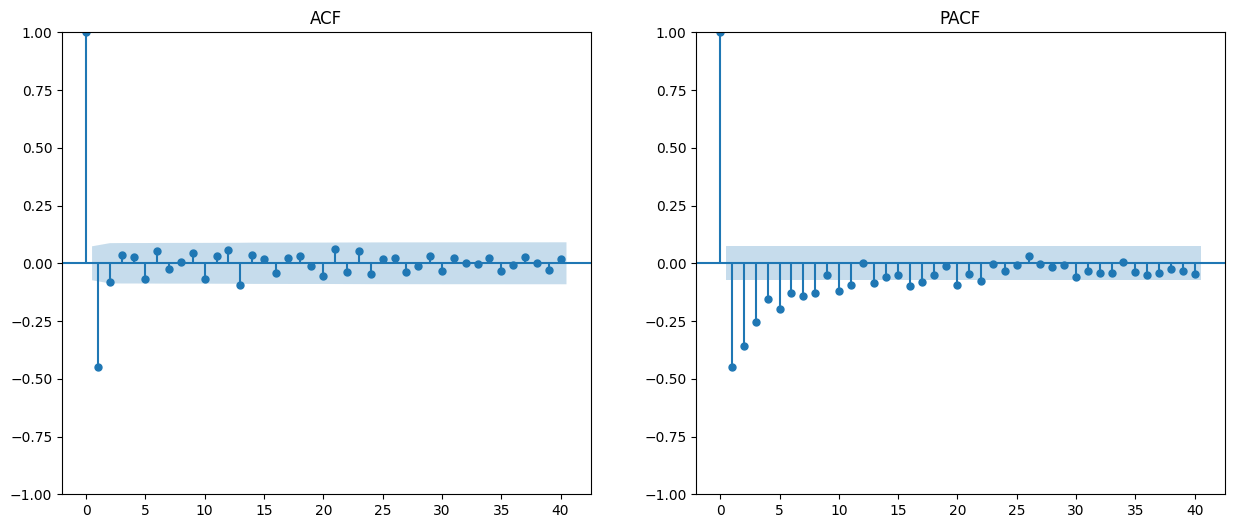

In [56]:
# Plot ACF and PACF
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sm.graphics.tsa.plot_acf(energy_consumption_diff1.dropna(), lags=40, ax=axs[0])
axs[0].set_title('ACF')
sm.graphics.tsa.plot_pacf(energy_consumption_diff1.dropna(), lags=40, ax=axs[1])
axs[1].set_title('PACF')

plt.show()

In [57]:
# Fit the ARIMA model
model = ARIMA(train, order=(8, 1, 1)) # we are plugging in consumption on  the original scale here and specify d=1
model_fit = model.fit()

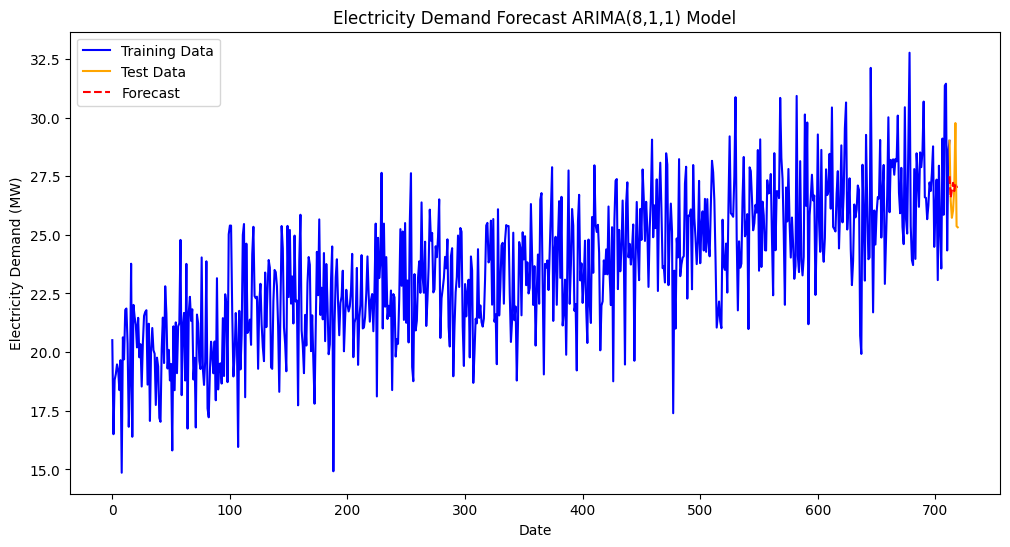

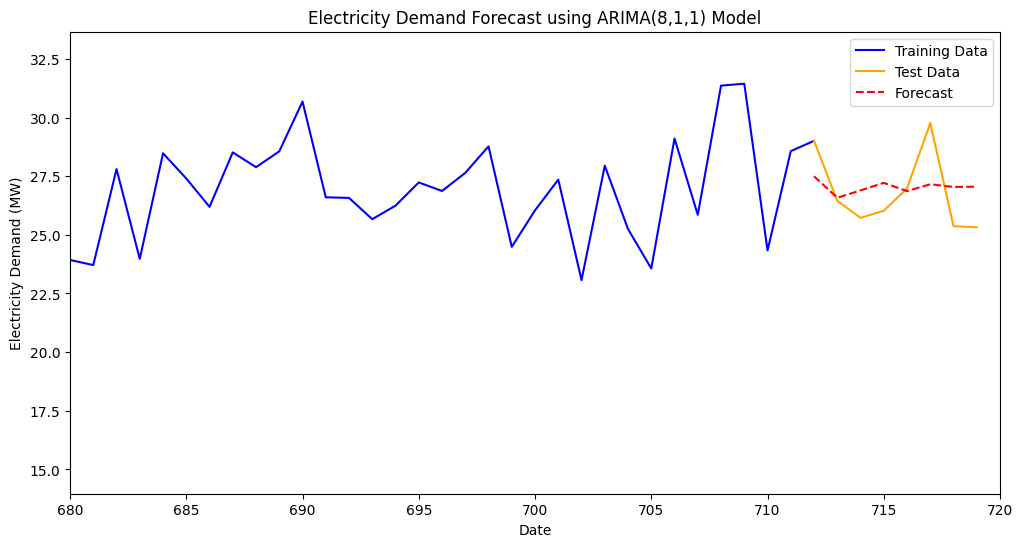

In [59]:
# Forecast the next n steps (same length as the test set)
forecast = model_fit.forecast(steps=len(test))

forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)

# Extend the training data with the first value of the test set for visualisation
first_test_value = pd.Series([test.iloc[0]], index=[test.index[0]])
extended_train = pd.concat([train, first_test_value])


plt.figure(figsize=(12, 6))
plt.plot(extended_train.index, extended_train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red', linestyle='--')  
plt.title('Electricity Demand Forecast ARIMA(8,1,1) Model') 
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()

# Optionally, if you want to limit the time range for plotting
plt.figure(figsize=(12, 6))
plt.plot(extended_train.index, extended_train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red', linestyle='--') 
plt.xlim(680, 720)  
plt.title('Electricity Demand Forecast using ARIMA(8,1,1) Model') 
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()

In [60]:
y = train  

# Fit the auto_arima model
model = auto_arima(y, seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3553.838, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3394.230, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3551.849, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3299.411, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3254.783, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3239.397, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3212.393, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3210.673, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3237.582, Time=0.06 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3130.565, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3130.888, T